In [1]:
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import glob

# Define the path to the CSV files
path = 'data/'  # Update this path to your actual data directory
activities = ['ret', 'lav', 'hoj']
all_files = []

# Collect all CSV files for each activity
for activity in activities:
    all_files.extend(glob.glob(path + f"*.{activity}.*.csv"))

# Read all CSV files into a single DataFrame
df_list = []
for filename in all_files:
    df = pd.read_csv(filename)
    df['activity'] = filename.split('/')[-1].split('.')[1]  # Extract activity name from filename
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

In [3]:
print(df.head())

   timestamp    accX  accY  accZ  pressure  gyroX  gyroY  gyroZ activity
0     259404 -100000 -7812  -781      2062    -49     25    -36      ret
1     259407 -100000 -7812  -781      2052    -49     25    -36      ret
2     259409 -100000 -7812  -781      2061    -49     25    -36      ret
3     259411 -100000 -7812  -781      2051    -49     25    -36      ret
4     259412  -99218 -8593  -781      2061    -49     25    -36      ret


In [4]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.signal import find_peaks
from statistics import mode
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Define window size and step size
window_size = 100
step_size = 50

# Initialize lists to store segmented data and labels
x_list = []
y_list = []
z_list = []
pressure_list = []
gyroX_list = []
gyroY_list = []
gyroZ_list = []
train_labels = []

# Segment the data into windows
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['accX'].values[i: i + window_size]
    ys = df['accY'].values[i: i + window_size]
    zs = df['accZ'].values[i: i + window_size]
    pressures = df['pressure'].values[i: i + window_size]
    gyroXs = df['gyroX'].values[i: i + window_size]
    gyroYs = df['gyroY'].values[i: i + window_size]
    gyroZs = df['gyroZ'].values[i: i + window_size] 
    label = mode(df['activity'][i: i + window_size])
    
    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    pressure_list.append(pressures)
    gyroX_list.append(gyroXs)
    gyroY_list.append(gyroYs)
    gyroZ_list.append(gyroZs)
    train_labels.append(label)

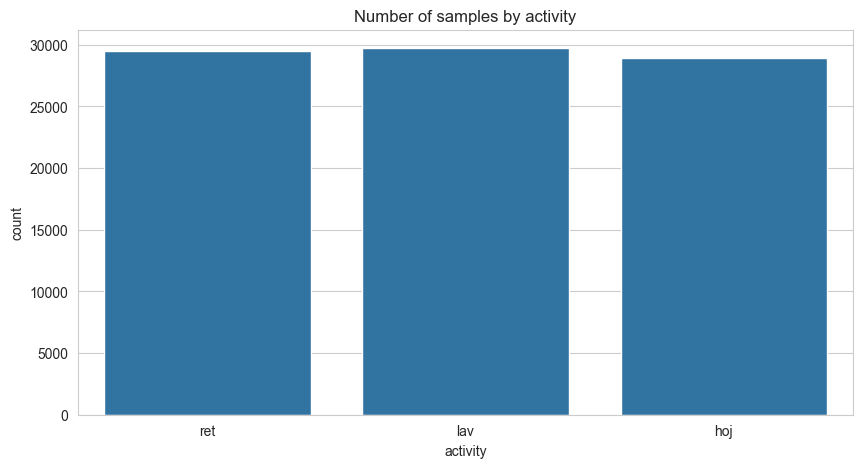

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x='activity', data=df)
plt.title('Number of samples by activity')
plt.show()

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the CSV files
path = 'data/'  # Update this path to your actual data directory
activities = ['ret', 'lav', 'hoj']
dfs = []

# Read the CSV files for each activity based on the new naming convention
for activity in activities:
    files = glob.glob(f"{path}*.{activity}.*.csv")  # Match the new naming pattern
    for filename in files:
        df = pd.read_csv(filename)
        df['activity'] = activity  # Assign the activity based on the loop variable
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

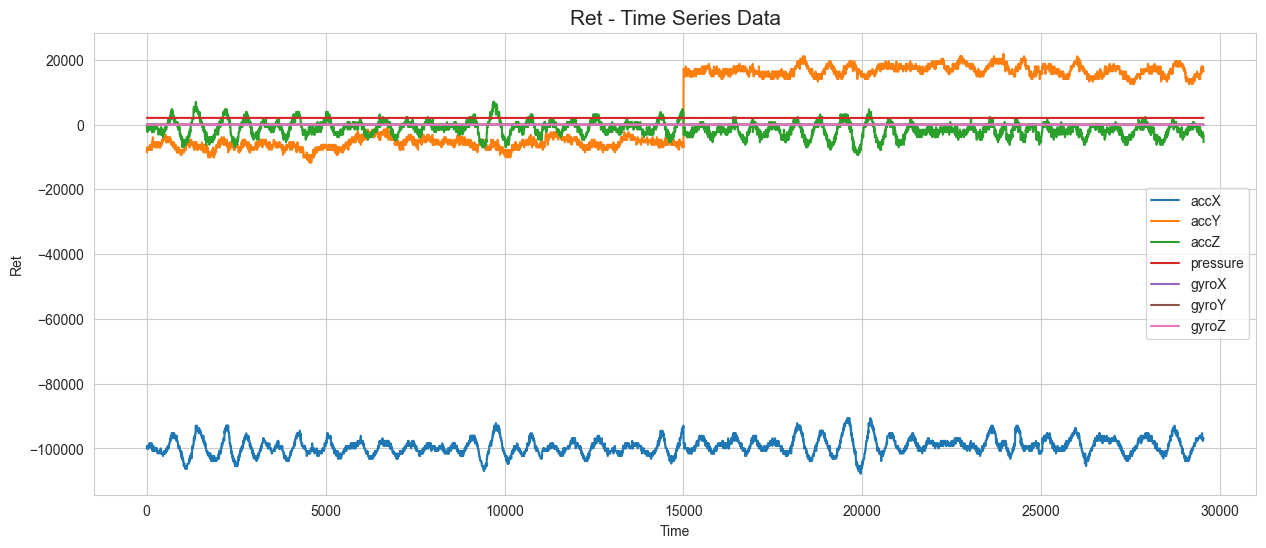

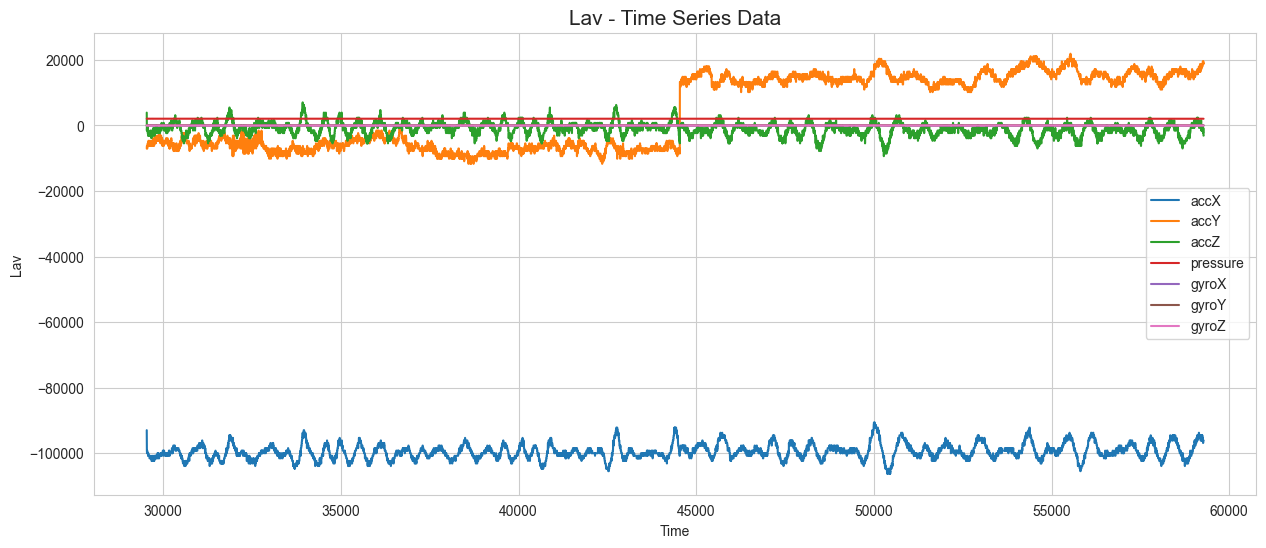

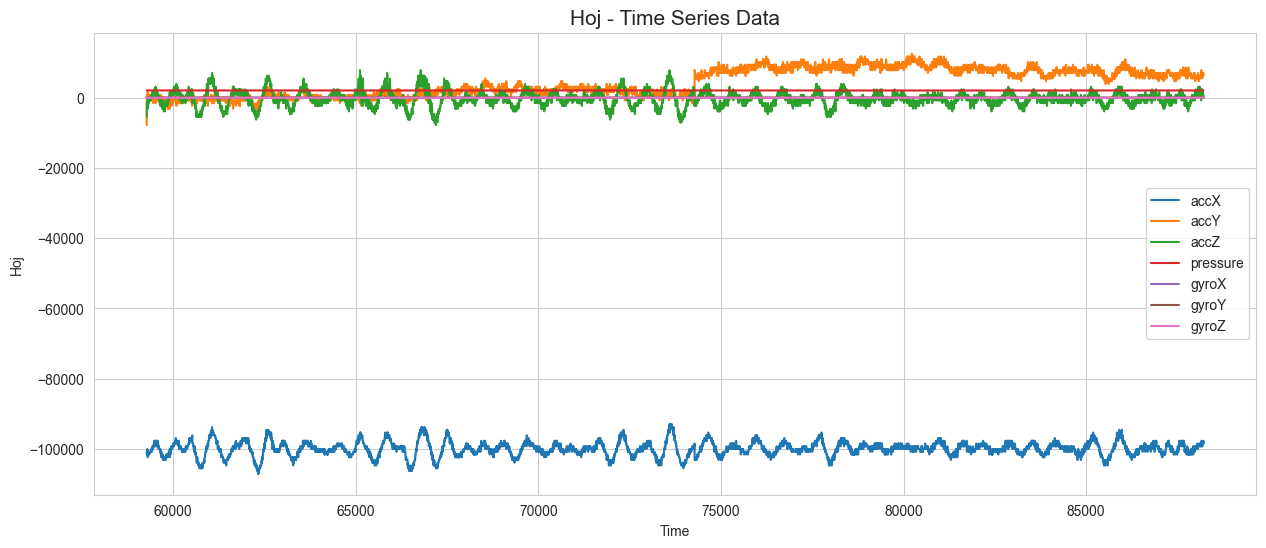

In [7]:
# Plot the time series data for each dimension (accX, accY, accZ, pressure, gyroX, gyroY, gyroZ) for each activity using Seaborn
for activity in activities:
    df_activity = df[df['activity'] == activity]
    plt.figure(figsize=(15, 6))
    
    # Plot accelerometer data
    sns.lineplot(y='accX', x=df_activity.index, data=df_activity, label='accX')
    sns.lineplot(y='accY', x=df_activity.index, data=df_activity, label='accY')
    sns.lineplot(y='accZ', x=df_activity.index, data=df_activity, label='accZ')
    
    # Plot pressure data
    sns.lineplot(y='pressure', x=df_activity.index, data=df_activity, label='pressure')
    
    # Plot gyroscope data
    sns.lineplot(y='gyroX', x=df_activity.index, data=df_activity, label='gyroX')
    sns.lineplot(y='gyroY', x=df_activity.index, data=df_activity, label='gyroY')
    sns.lineplot(y='gyroZ', x=df_activity.index, data=df_activity, label='gyroZ')
    
    plt.legend()
    plt.ylabel(activity.capitalize())
    plt.title(f"{activity.capitalize()} - Time Series Data", fontsize=15)
    plt.xlabel('Time')
    plt.show()

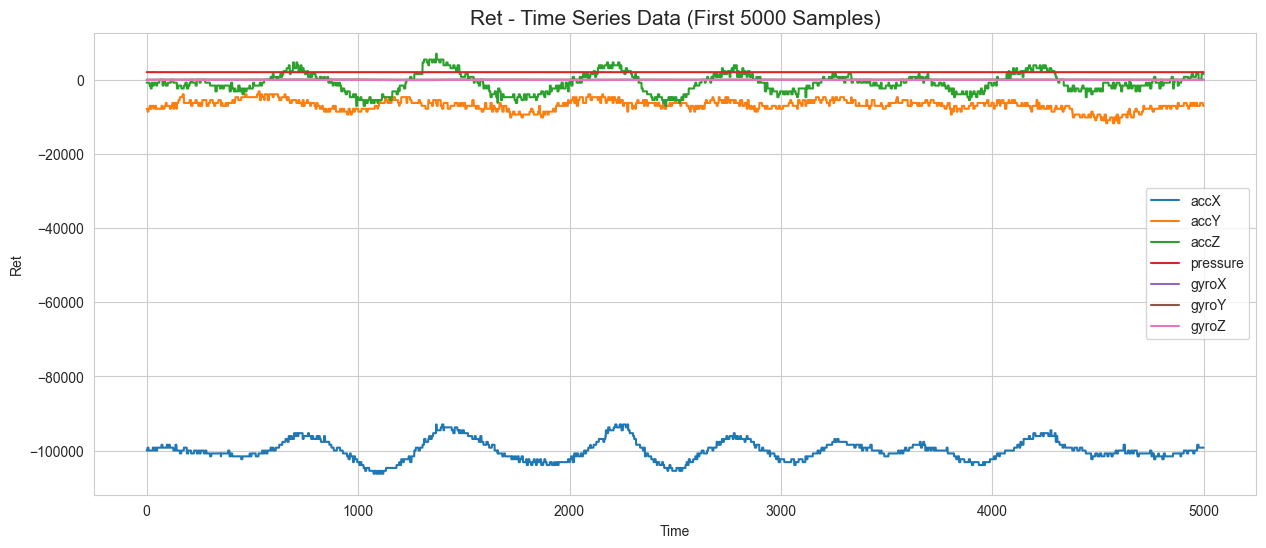

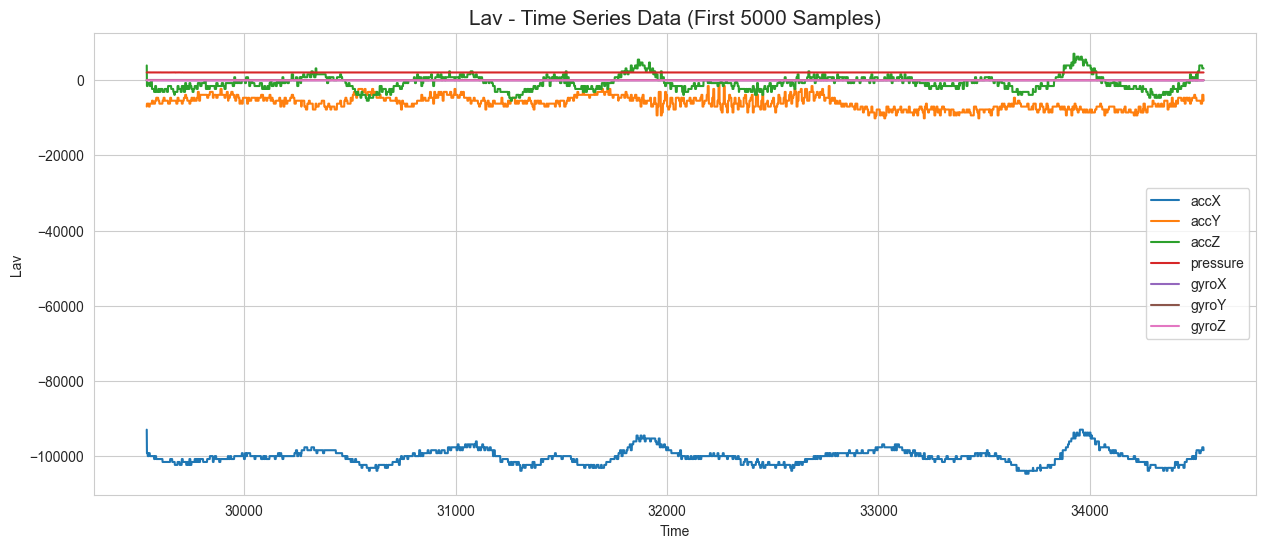

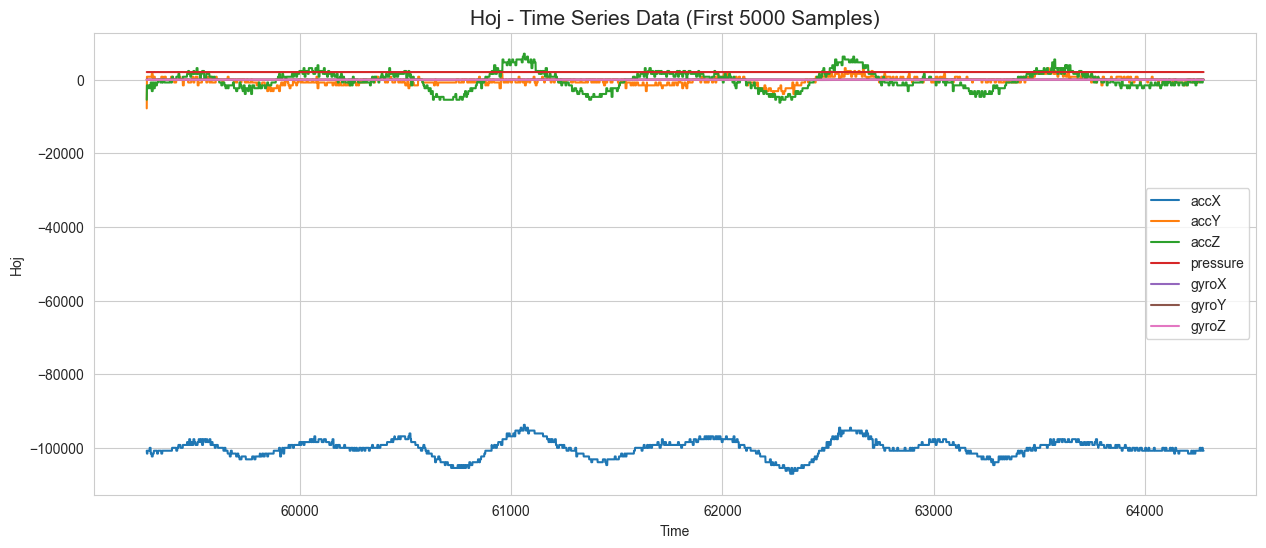

In [8]:
# Plot the time series data for each dimension (accX, accY, accZ, pressure, gyroX, gyroY, gyroZ) for each activity using Seaborn
for activity in activities:
    df_activity = df[df['activity'] == activity].iloc[:5000]  # Only first 5000 samples
    plt.figure(figsize=(15, 6))
    
    # Plot accelerometer data
    sns.lineplot(y='accX', x=df_activity.index, data=df_activity, label='accX')
    sns.lineplot(y='accY', x=df_activity.index, data=df_activity, label='accY')
    sns.lineplot(y='accZ', x=df_activity.index, data=df_activity, label='accZ')
    
    # Plot pressure data
    sns.lineplot(y='pressure', x=df_activity.index, data=df_activity, label='pressure')
    
    # Plot gyroscope data
    sns.lineplot(y='gyroX', x=df_activity.index, data=df_activity, label='gyroX')
    sns.lineplot(y='gyroY', x=df_activity.index, data=df_activity, label='gyroY')
    sns.lineplot(y='gyroZ', x=df_activity.index, data=df_activity, label='gyroZ')
    
    plt.legend()
    plt.ylabel(activity.capitalize())
    plt.title(f"{activity.capitalize()} - Time Series Data (First 5000 Samples)", fontsize=15)
    plt.xlabel('Time')
    plt.show()

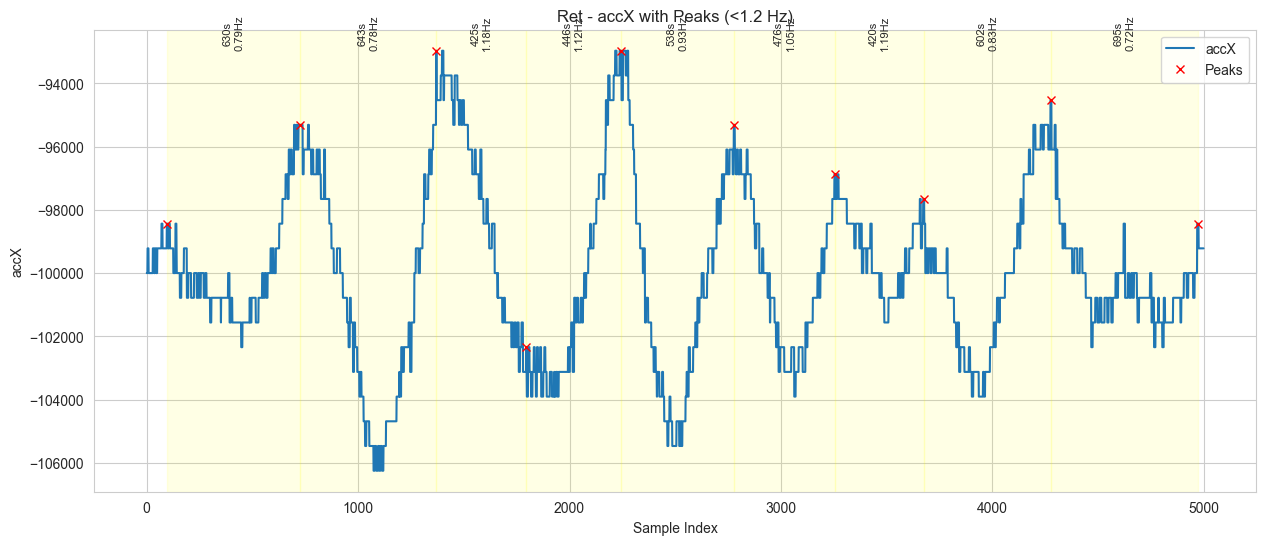

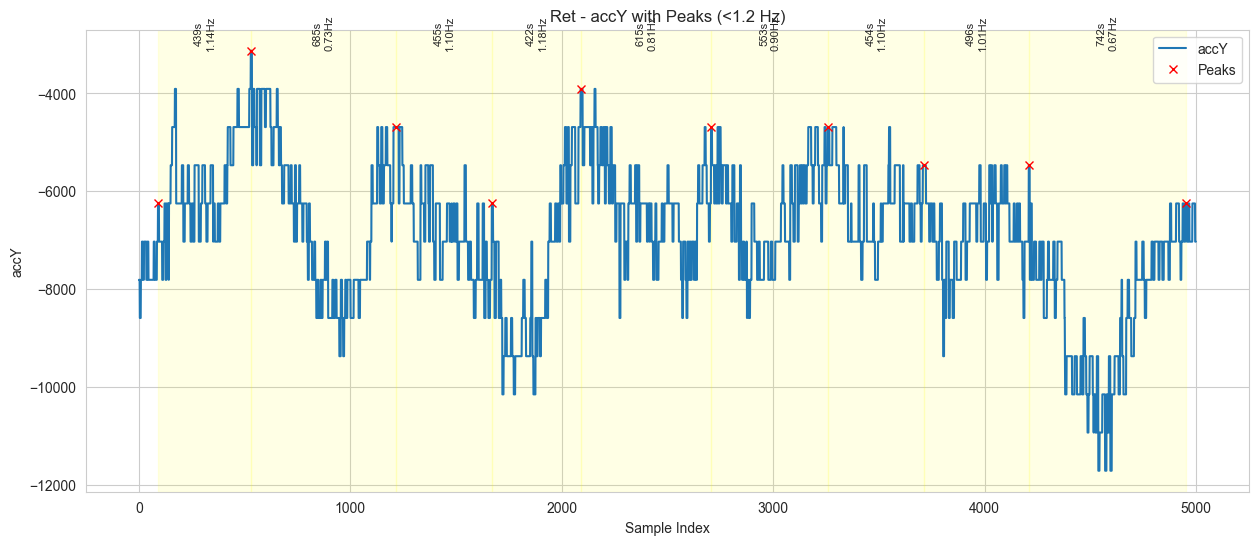

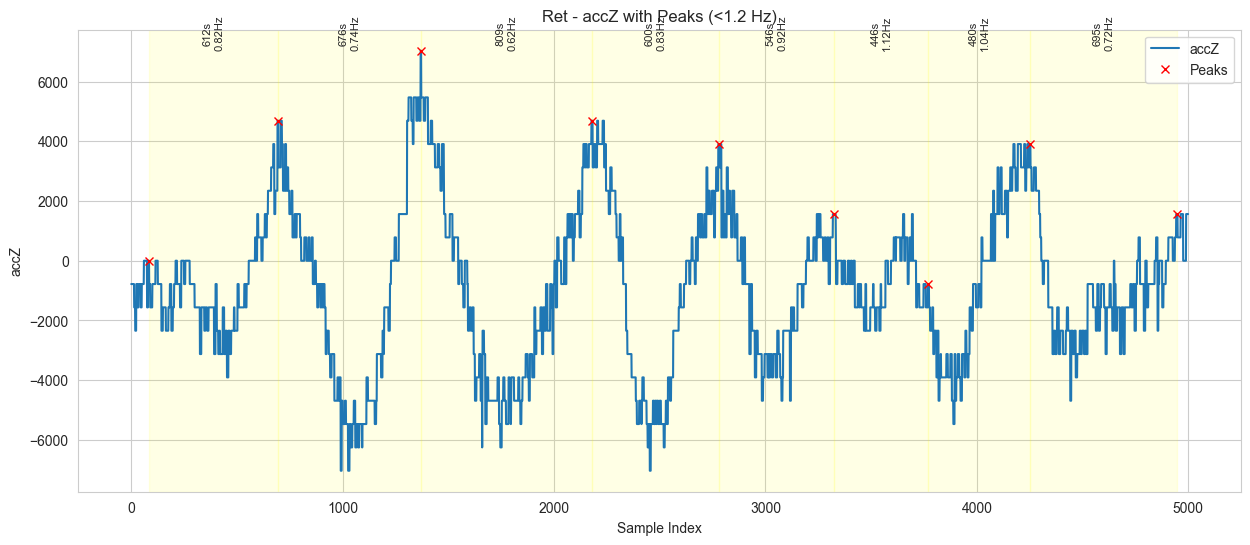

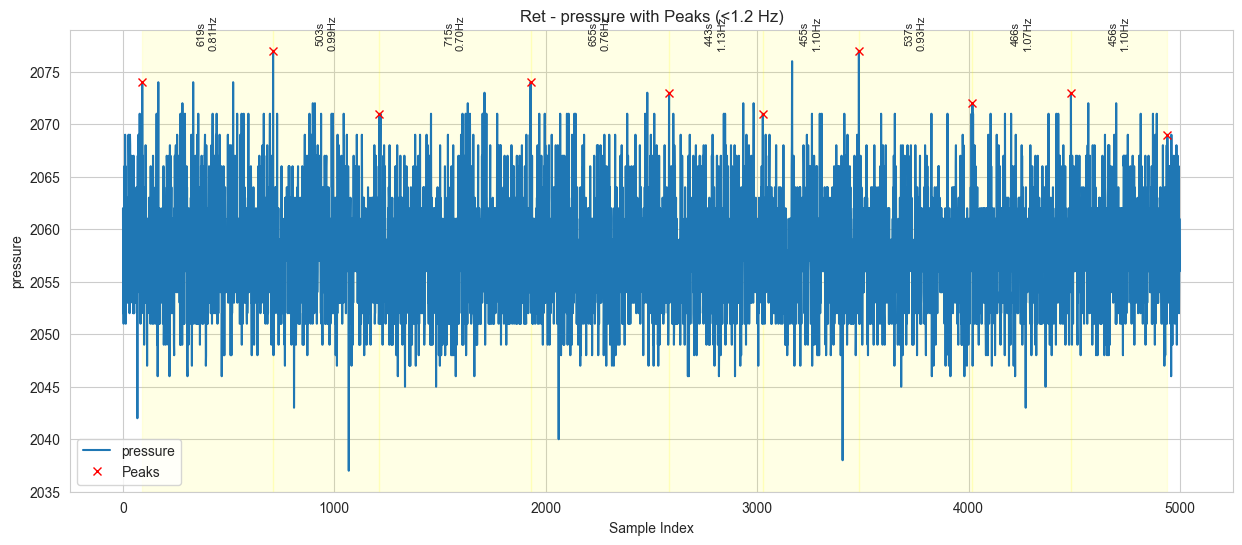

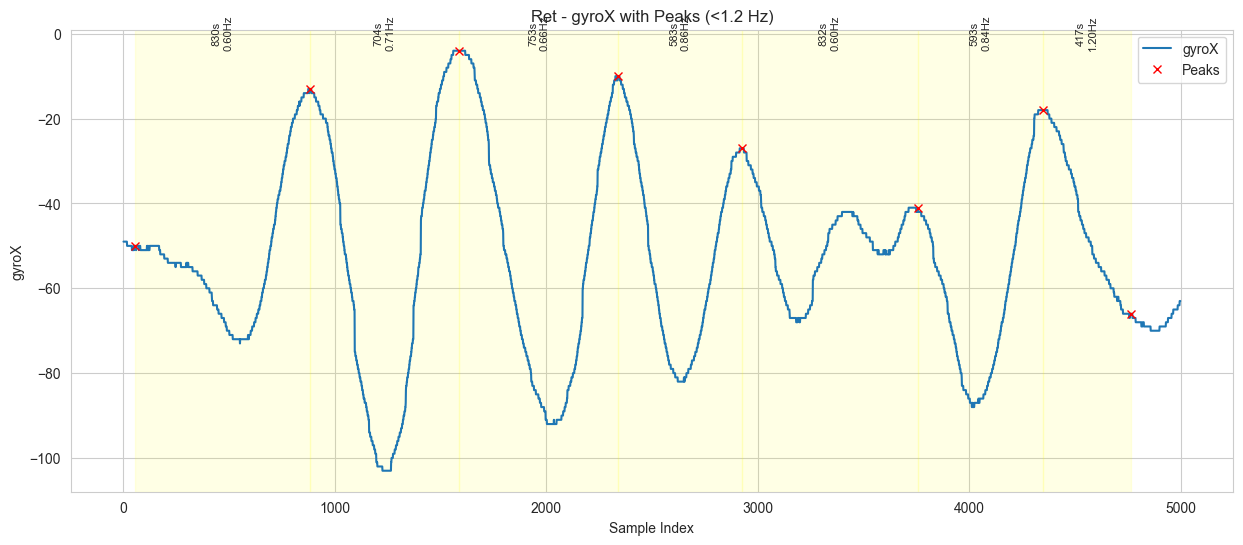

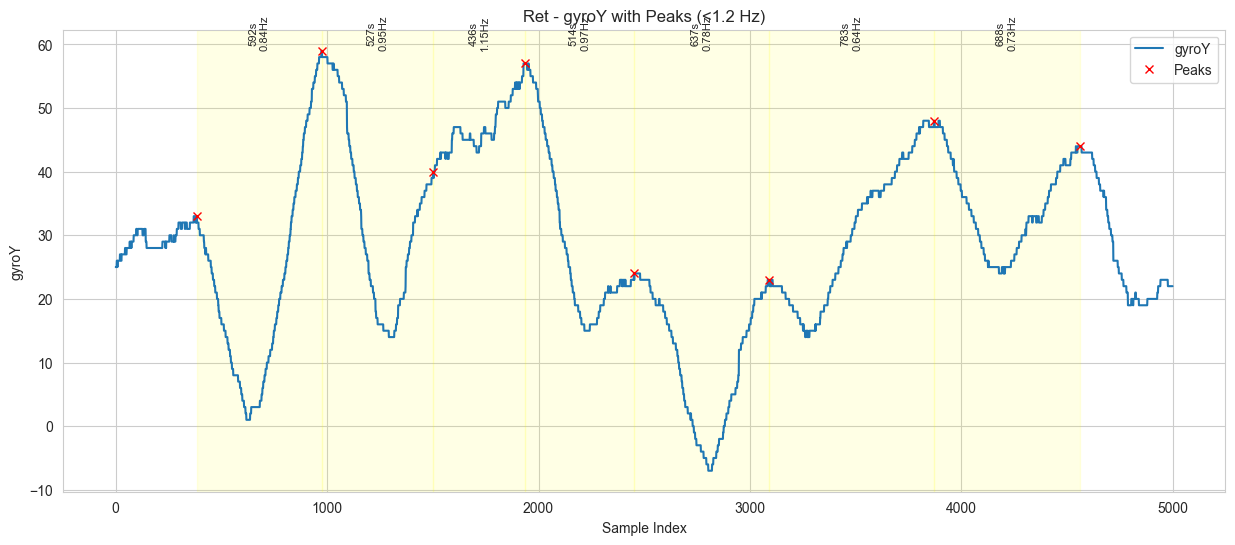

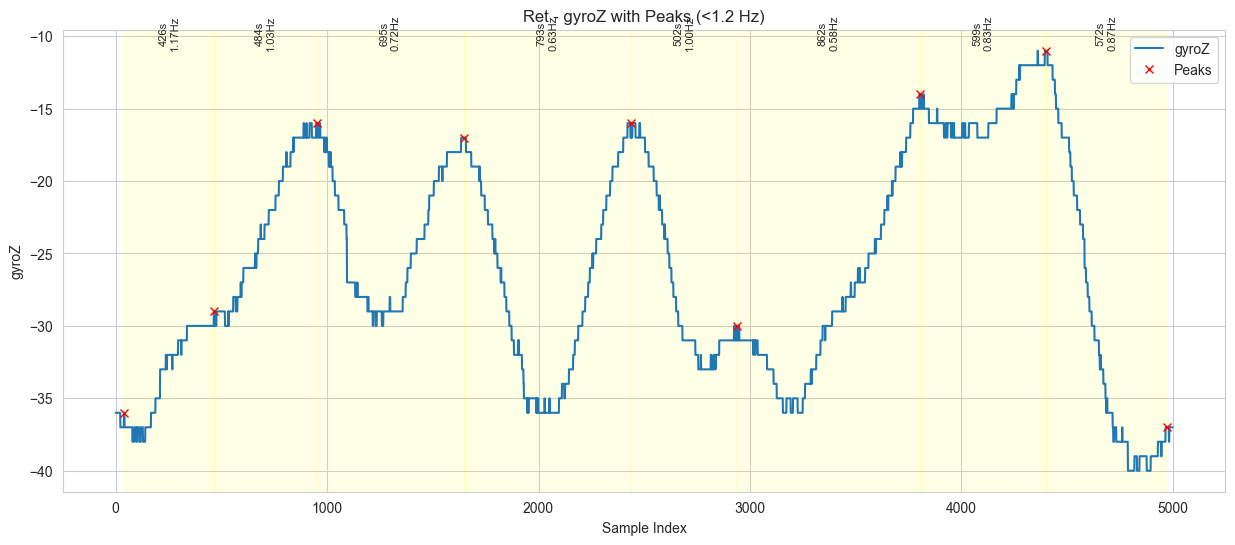

In [9]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

fs = 500  # Sampling frequency (Hz)
min_distance = int(fs / 1.2)  # Minimum samples between peaks for 5 Hz

sensor_columns = ['accX', 'accY', 'accZ', 'pressure', 'gyroX', 'gyroY', 'gyroZ']
activity = 'ret'
df_activity = df[df['activity'] == activity].iloc[:5000]

for sensor in sensor_columns:
    signal = df_activity[sensor].values
    peaks, _ = find_peaks(signal, distance=min_distance)
    sample_diffs = np.diff(peaks)
    freq_between_peaks = fs / sample_diffs

    plt.figure(figsize=(15, 6))
    plt.plot(df_activity.index, signal, label=sensor)
    plt.plot(df_activity.index[peaks], signal[peaks], "rx", label='Peaks')
    for i in range(len(peaks)-1):
        plt.axvspan(df_activity.index[peaks[i]], df_activity.index[peaks[i+1]], color='yellow', alpha=0.1)
        plt.text((df_activity.index[peaks[i]] + df_activity.index[peaks[i+1]])/2,
                 max(signal), f"{sample_diffs[i]}s\n{freq_between_peaks[i]:.2f}Hz",
                 ha='center', va='bottom', fontsize=8, rotation=90)
    plt.title(f"{activity.capitalize()} - {sensor} with Peaks (<1.2 Hz)")
    plt.xlabel('Sample Index')
    plt.ylabel(sensor)
    plt.legend()
    plt.show()

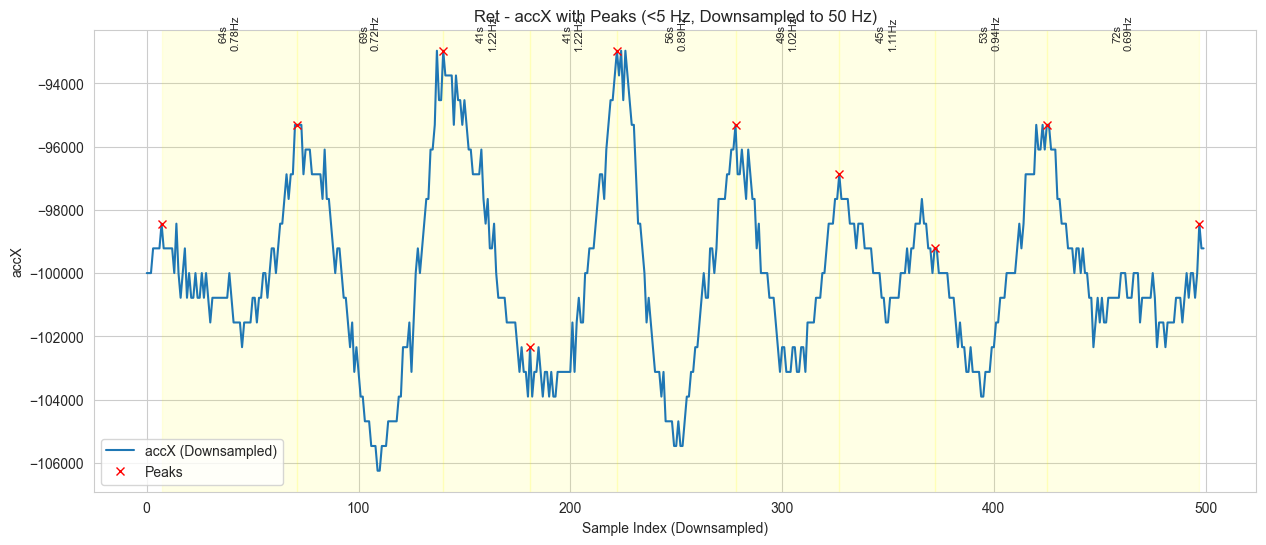

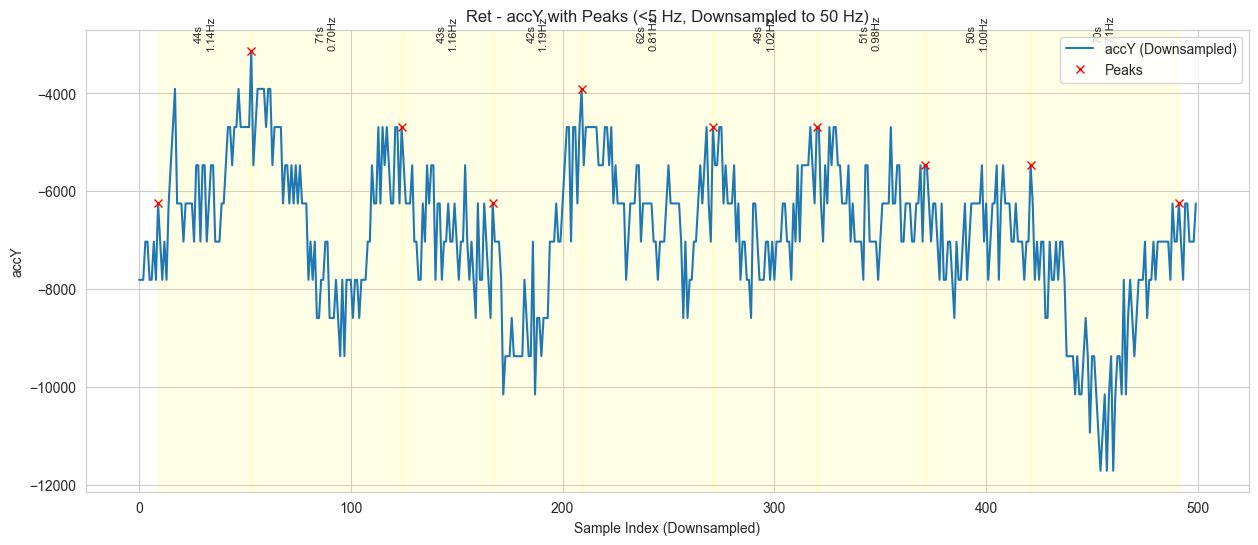

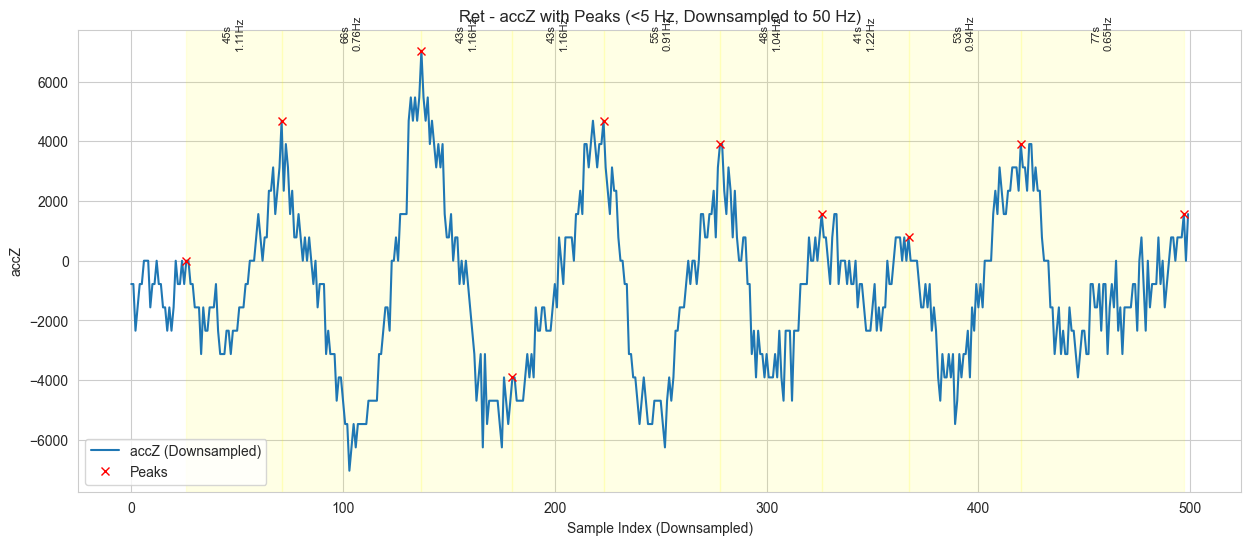

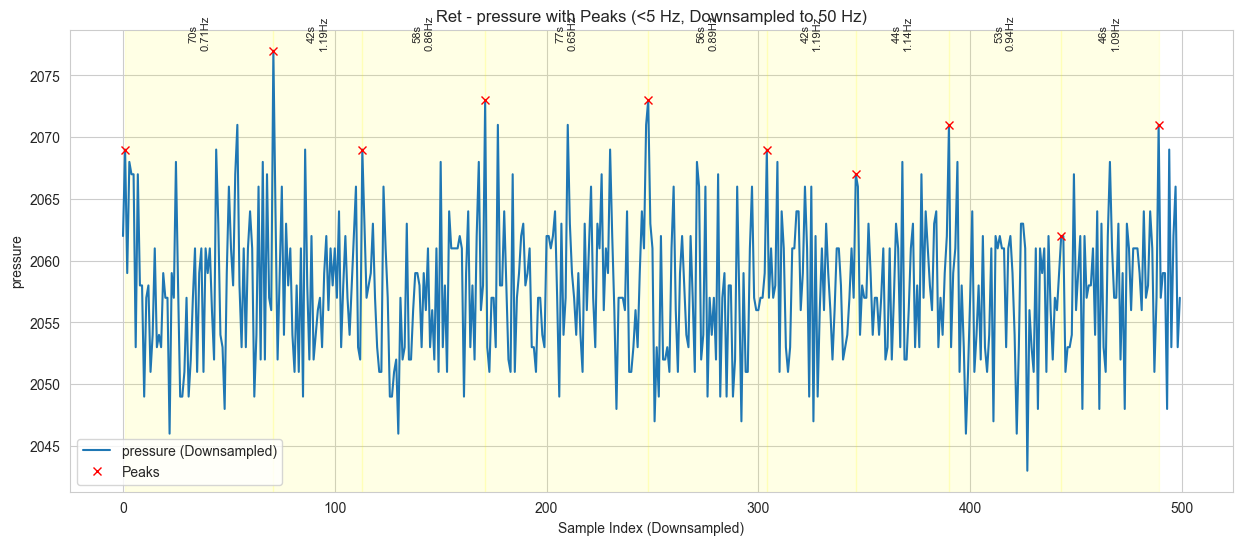

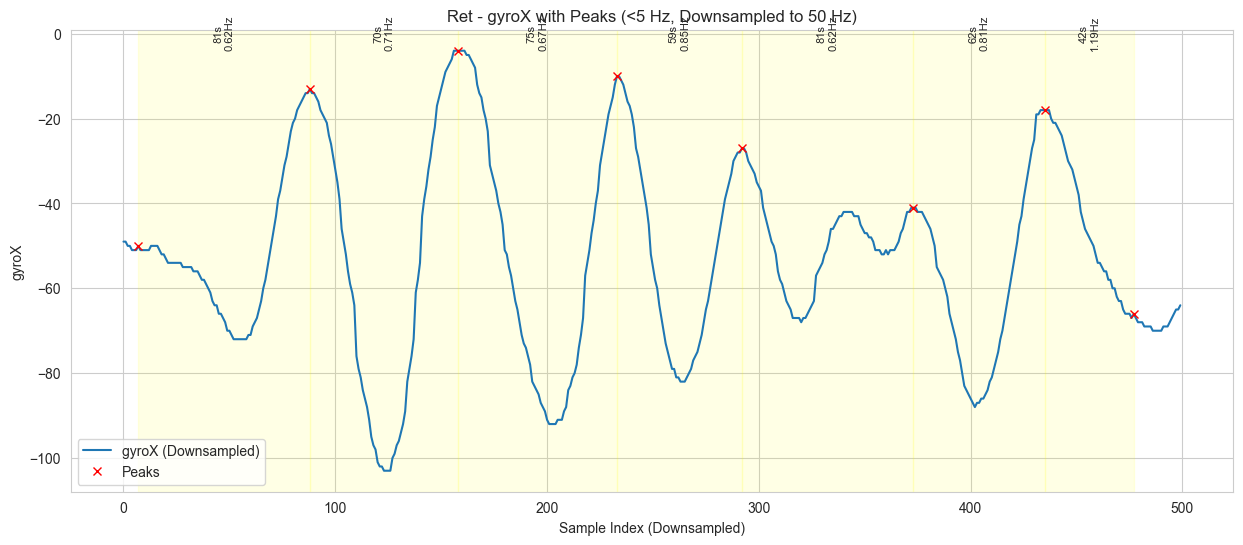

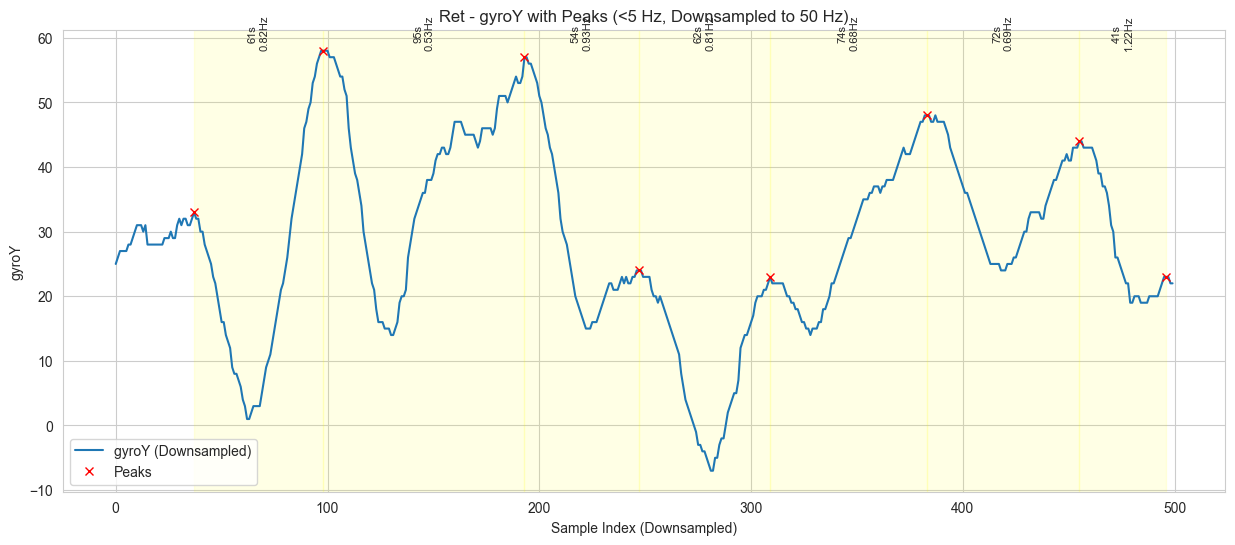

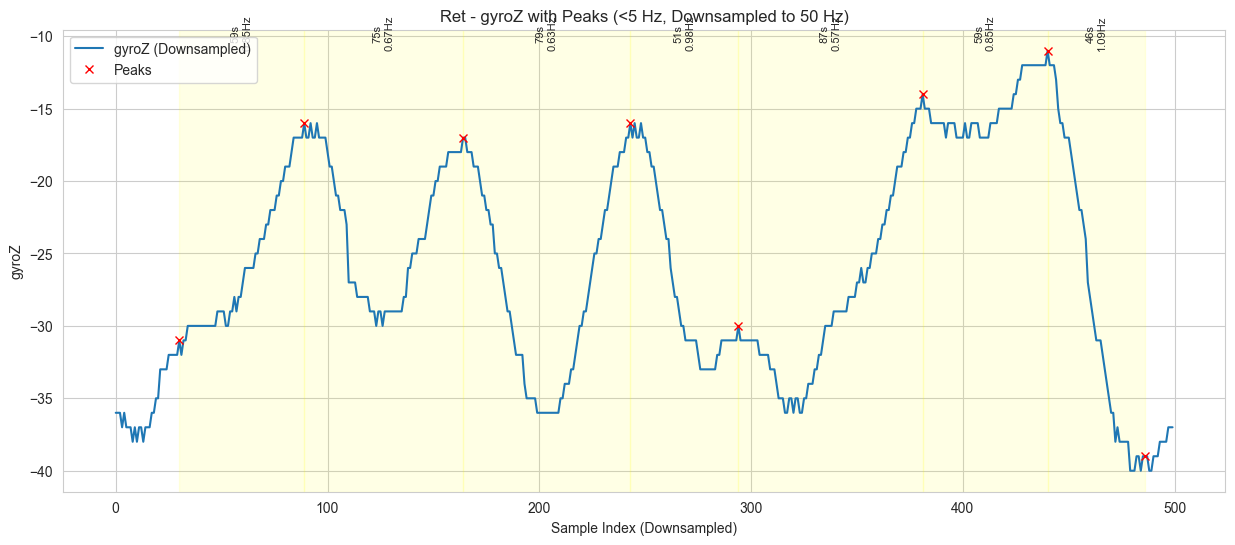

In [10]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

fs_down = 50  # New sampling frequency (Hz)
downsample_factor = 10  # 500 Hz / 50 Hz

sensor_columns = ['accX', 'accY', 'accZ', 'pressure', 'gyroX', 'gyroY', 'gyroZ']
activity = 'ret'
df_activity = df[df['activity'] == activity].iloc[:5000]

# Downsample: take every 10th sample
df_down = df_activity.iloc[::downsample_factor].reset_index(drop=True)

min_distance = int(fs_down / 1.2)  # Minimum samples between peaks for 5 Hz

for sensor in sensor_columns:
    signal = df_down[sensor].values
    peaks, _ = find_peaks(signal, distance=min_distance)
    sample_diffs = np.diff(peaks)
    freq_between_peaks = fs_down / sample_diffs

    plt.figure(figsize=(15, 6))
    plt.plot(df_down.index, signal, label=f'{sensor} (Downsampled)')
    plt.plot(df_down.index[peaks], signal[peaks], "rx", label='Peaks')
    for i in range(len(peaks)-1):
        plt.axvspan(df_down.index[peaks[i]], df_down.index[peaks[i+1]], color='yellow', alpha=0.1)
        plt.text((df_down.index[peaks[i]] + df_down.index[peaks[i+1]])/2,
                 max(signal), f"{sample_diffs[i]}s\n{freq_between_peaks[i]:.2f}Hz",
                 ha='center', va='bottom', fontsize=8, rotation=90)
    plt.title(f"{activity.capitalize()} - {sensor} with Peaks (<5 Hz, Downsampled to 50 Hz)")
    plt.xlabel('Sample Index (Downsampled)')
    plt.ylabel(sensor)
    plt.legend()
    plt.show()

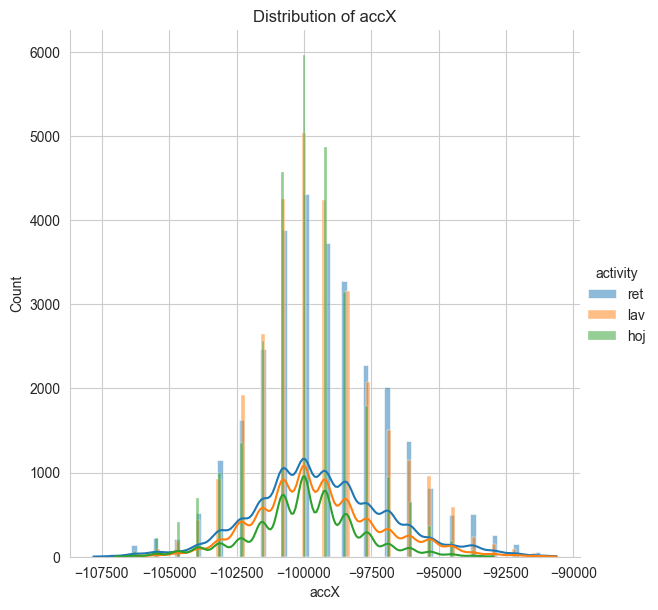

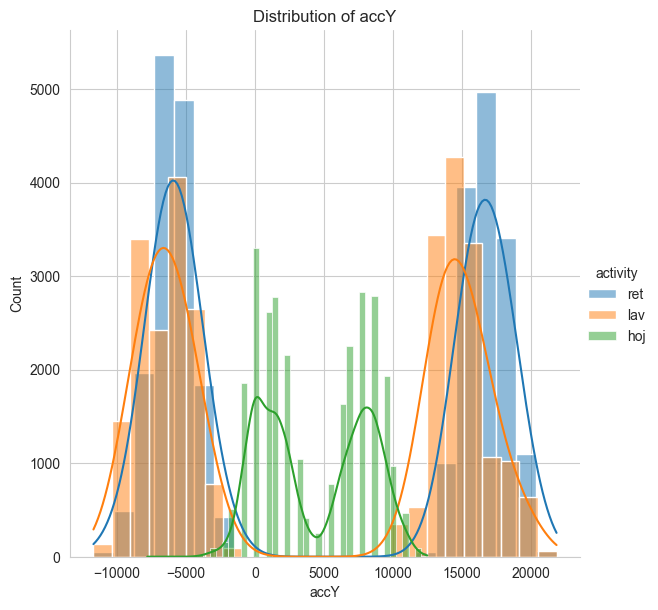

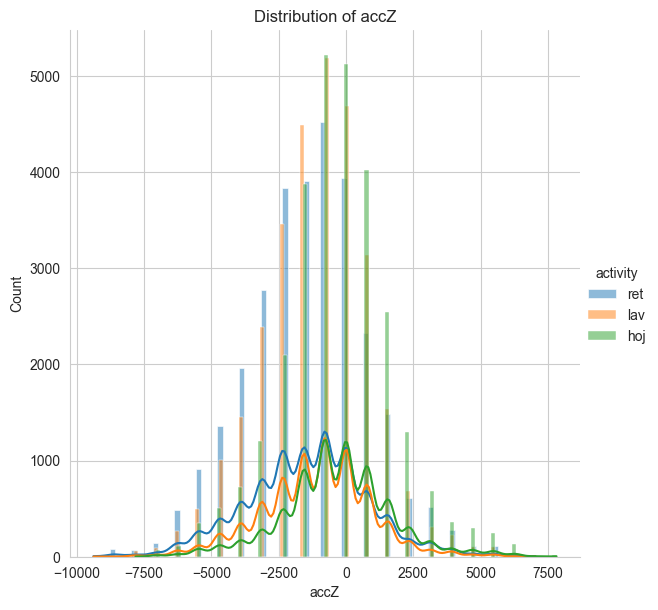

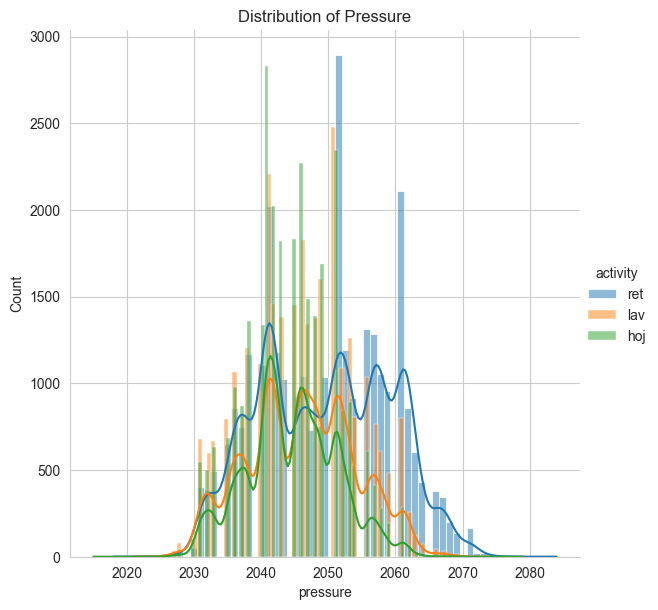

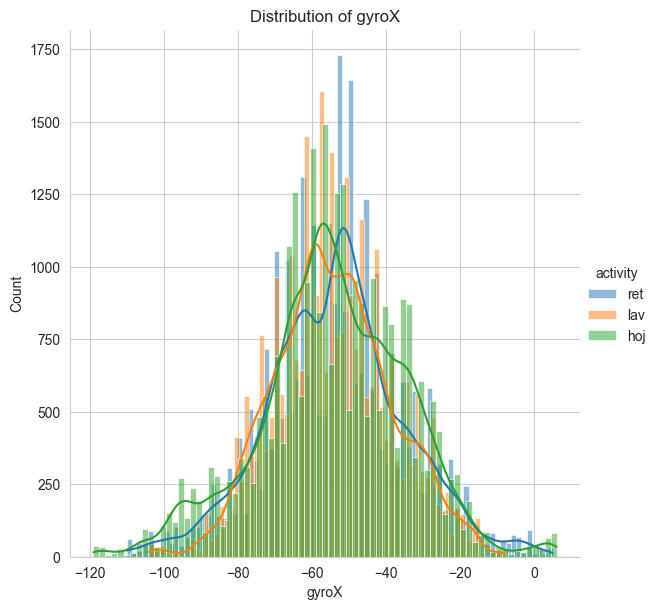

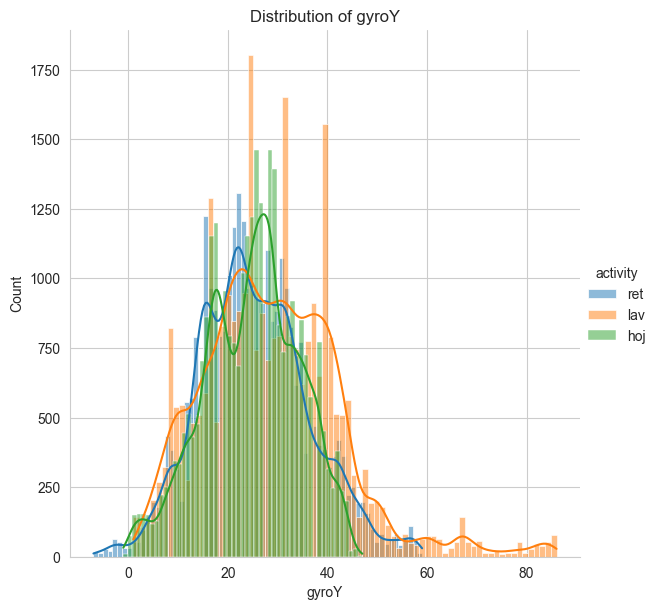

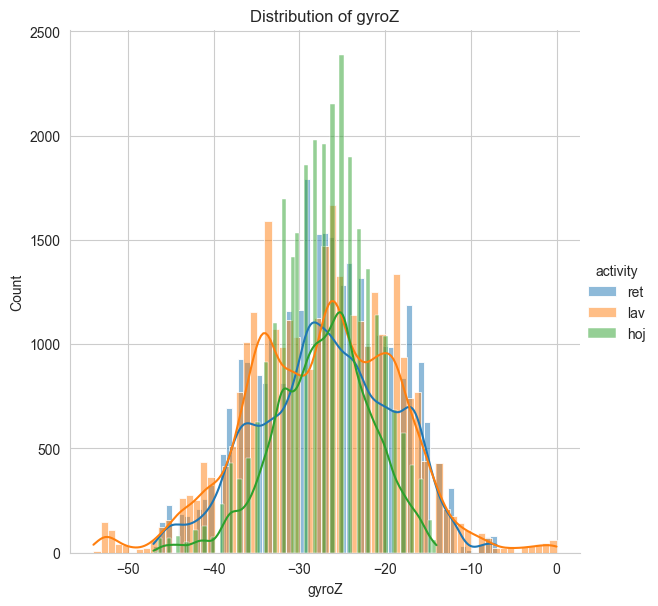

In [ ]:
# Plot the distribution for accX
sns.FacetGrid(df, hue='activity', height=6).map(sns.histplot, 'accX', kde=True).add_legend()
plt.title('Distribution of accX')
plt.show()

# Plot the distribution for accY
sns.FacetGrid(df, hue='activity', height=6).map(sns.histplot, 'accY', kde=True).add_legend()
plt.title('Distribution of accY')
plt.show()

# Plot the distribution for accZ
sns.FacetGrid(df, hue='activity', height=6).map(sns.histplot, 'accZ', kde=True).add_legend()
plt.title('Distribution of accZ')
plt.show()

# Plot the distribution for pressure
sns.FacetGrid(df, hue='activity', height=6).map(sns.histplot, 'pressure', kde=True).add_legend()
plt.title('Distribution of Pressure')
plt.show()

# Plot the distribution for gyroX
sns.FacetGrid(df, hue='activity', height=6).map(sns.histplot, 'gyroX', kde=True).add_legend()
plt.title('Distribution of gyroX')
plt.show()

# Plot the distribution for gyroY
sns.FacetGrid(df, hue='activity', height=6).map(sns.histplot, 'gyroY', kde=True).add_legend()
plt.title('Distribution of gyroY')
plt.show()

# Plot the distribution for gyroZ
sns.FacetGrid(df, hue='activity', height=6).map(sns.histplot, 'gyroZ', kde=True).add_legend()
plt.title('Distribution of gyroZ')
plt.show()